# Average Speed of Answer, Average Handling Time, and After Call Work for Field Support Center
<em>Chris Rucker, Associate Data Scientist</em>

<em>14 Nov 2016</em>

## Observation

Three discrete quantitative variables were chosen for exploration from a data set of 42 observations from the Field Support Center's (FSC) CS Monthly Flash reports. 

<ul><li>Average Handling Time (AHT) is the amount of time it takes an Agent to deal with all aspects of a call including talk time plus After Call Work increases.</li></ul>
<ul><li>After Call Work (ACW) is the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent.</li></ul>
<ul><li>Average Speed of Answer (ASA) is the amount of time it takes to answer a typical call once it has been routed to the FSC.</li></ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [29]:
data = pd.read_csv('C:\Users\crucker\calls.csv')
data.head()

,date,calls offered to queue,sales,retention,AHT,ACW,ASA
0,1,548792,71442,61461,346,9,33
1,2,579488,67364,65161,349,9,24
2,3,607728,69317,71092,348,9,22
3,4,662836,77384,76004,355,9,36
4,5,610952,70745,66888,356,10,33


## <p><b>ASA &#8593; AHT &#8593;</b></p>

<em><b>As the amount of time it takes to answer a typical call once it has been routed to the FSC increases, the amount of time it takes an Agent to deal with all aspects of a call including talk time plus ACW increases.</b></em> 

A bivariate distribution of ASA/AHT variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of 0.77 and a p-value of 1.8e-09. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Positive correlations imply that as AHT increases, so does ASA. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

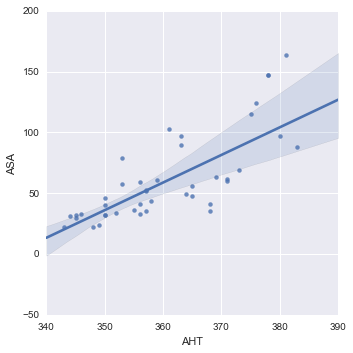

In [60]:
seaborn.lmplot(x='AHT', y='ASA', data=data, robust=True)  

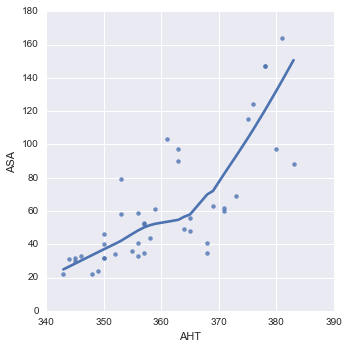

In [24]:
seaborn.lmplot(x='AHT', y='ASA', data=data, lowess=True)  

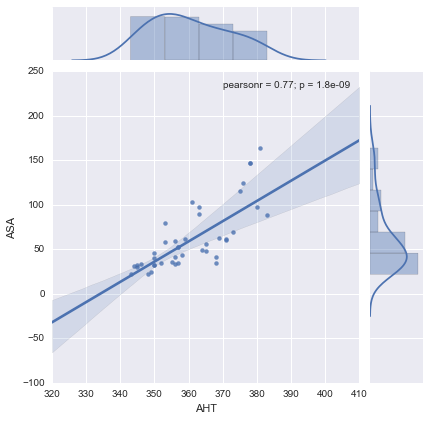

In [25]:
sns.jointplot(x='AHT', y='ASA', data=data, kind="reg", robust=True);

## <p><b>ACW &#8595; ASA &#8595;</b></p>

<em><b>As the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent decreases, the amount of time it takes to answer a typical call once it has been routed to the FSC decreases.</b></em> 

A bivariate distribution of ACW/ASA variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of -0.48 and a p-value of 0.0013. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Negative correlations imply that as ASA increases, ACW decreases. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

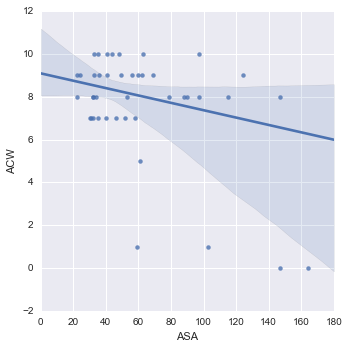

In [26]:
seaborn.lmplot(x='ASA', y='ACW', data=data, robust=True)  

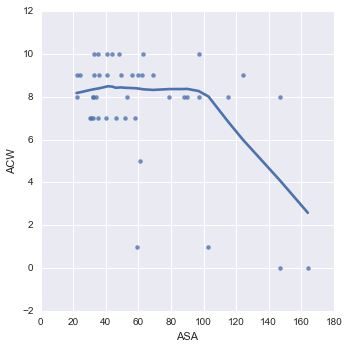

In [27]:
seaborn.lmplot(x='ASA', y='ACW', data=data, lowess=True)  

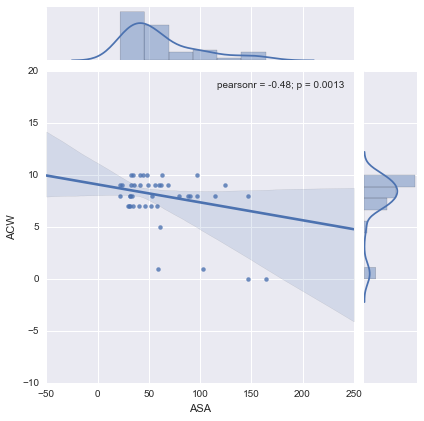

In [28]:
sns.jointplot(x='ASA', y='ACW', data=data, kind="reg", robust=True);

## <p><b>ACW &#8595; AHT &#8593;</b></p>

<em><b>As the period of time immediately after contact with the customer is completed and any supplementary work is 
undertaken by the Agent decreases, the amount of time it takes an Agent to deal with all aspects of a call increases.</b></em> 

A bivariate distribution of AHT/ACW variables along with the univariate (or marginal) distribution of each on separate axes shows a Pearson correlation coefficient of -0.096 and a p-value of 0.55. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. Negative correlations imply that as AHT increases, ACW decreases. 

An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

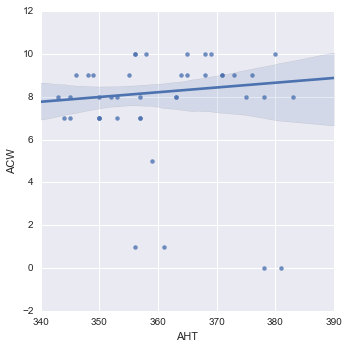

In [29]:
seaborn.lmplot(x='AHT', y='ACW', data=data, robust=True) 

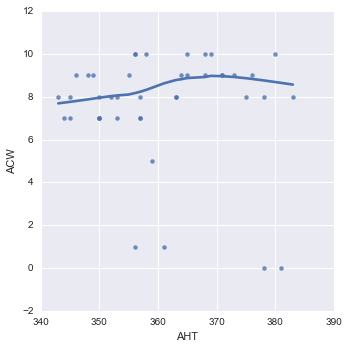

In [30]:
seaborn.lmplot(x='AHT', y='ACW', data=data, lowess=True) 

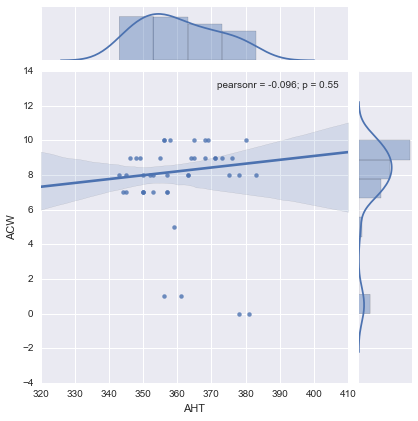

In [31]:
sns.jointplot(x='AHT', y='ACW', data=data, kind="reg", robust=True);

## Conclusion

As the amount of time it takes to answer a typical call once it has been routed to the FSC increases, the amount of time it takes an Agent to deal with all aspects of a call including talk time plus ACW increases.

As the period of time immediately after contact with the customer is completed and any supplementary work is undertaken by the Agent decreases, the amount of time it takes to answer a typical call once it has been routed to the FSC decreases.

As the period of time immediately after contact with the customer is completed and any supplementary work is 
undertaken by the Agent decreases, the amount of time it takes an Agent to deal with all aspects of a call increases.